In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Expe.')

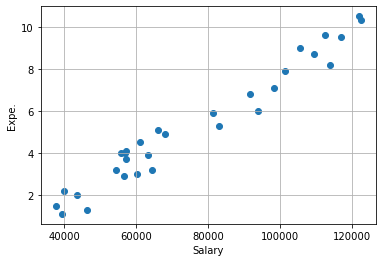

In [4]:
plt.scatter(df['Salary'],df['YearsExperience'])
plt.grid()
plt.xlabel('Salary')
plt.ylabel('Expe.')

In [20]:
import seaborn as sns

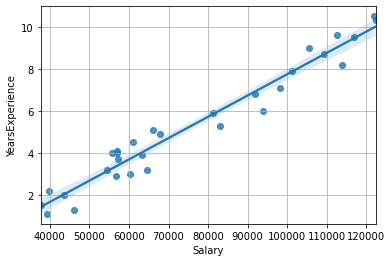

In [21]:
sns.regplot(x='Salary',y='YearsExperience',data=df)
plt.grid()

In [22]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.25, random_state = 101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression().fit(xtrain, ytrain)

In [27]:
model.score(xtest, ytest)*100

98.20915410004406

## Polynomial Regression

In [6]:
import numpy as np

In [7]:
np.random.seed(20)

In [8]:
x=6-7*np.random.normal(0,1,30)

In [9]:
x

array([-0.18725179,  4.62894485,  3.49724439, 22.40283334, 13.59382811,
        2.08212597, -0.57628545, 12.84936729,  2.47832212,  3.15509872,
        3.73577293,  9.45387617, 11.54411754, 11.89657554, 14.95651863,
        4.27999381,  6.3093636 , -4.97342787, -1.35776076,  3.15542102,
        7.18052271, 28.32791952, -1.84092581, -3.32944746,  7.70337136,
        6.91021498,  6.7631216 , -4.89330507,  5.09855153, 20.46864106])

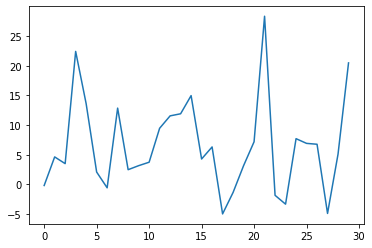

In [10]:
plt.plot(x)

In [12]:
y = x - 4*(x**2) + 0.4*(x**3) + np.random.normal(-2,2,30)

In [13]:
y

array([-3.98751652e+00, -4.31774796e+01, -2.92606475e+01,  2.51064255e+03,
        2.79841195e+02, -1.56378587e+01,  2.08070659e-01,  1.99747553e+02,
       -1.66191741e+01, -2.90717734e+01, -3.30360695e+01, -1.25268619e+01,
        9.01463148e+01,  1.16238089e+02,  4.54536317e+02, -4.05973314e+01,
       -5.49364194e+01, -1.54200944e+02, -1.04401781e+01, -2.51294911e+01,
       -5.28918864e+01,  5.91135664e+03, -1.96052768e+01, -6.29327966e+01,
       -4.96303221e+01, -5.12111886e+01, -5.52676325e+01, -1.47240163e+02,
       -4.97449771e+01,  1.76906451e+03])

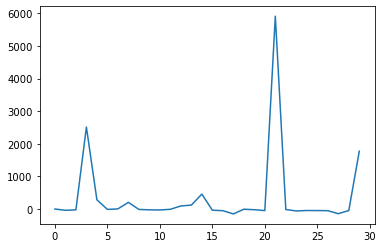

In [14]:
plt.plot(y)

In [15]:
len(x)

30

In [16]:
len(y)

30

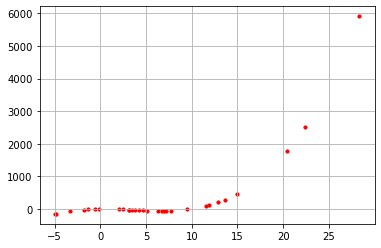

In [18]:
plt.scatter(x,y,c='r',s=10)
plt.grid()

<AxesSubplot:>

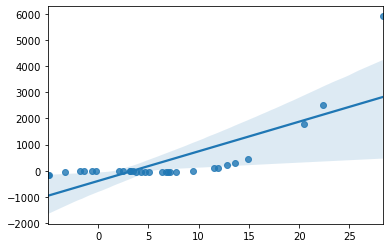

In [28]:
sns.regplot(x=x,y=y)

In [29]:
x

array([-0.18725179,  4.62894485,  3.49724439, 22.40283334, 13.59382811,
        2.08212597, -0.57628545, 12.84936729,  2.47832212,  3.15509872,
        3.73577293,  9.45387617, 11.54411754, 11.89657554, 14.95651863,
        4.27999381,  6.3093636 , -4.97342787, -1.35776076,  3.15542102,
        7.18052271, 28.32791952, -1.84092581, -3.32944746,  7.70337136,
        6.91021498,  6.7631216 , -4.89330507,  5.09855153, 20.46864106])

In [30]:
X=pd.DataFrame(x)

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=101)

In [32]:
model = LinearRegression().fit(xtrain,ytrain)

In [33]:
model.score(xtest,ytest)

-45.14640778180383

In [34]:
model = LinearRegression().fit(X,y)
100*model.score(X,y)

56.89771858915743

In [35]:
# so we'll use polynomial feature extractor


In [36]:
X.head()

,0
0,-0.187252
1,4.628945
2,3.497244
3,22.402833
4,13.593828


In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
x_poly = PolynomialFeatures().fit_transform(X)
x_poly

array([[ 1.00000000e+00, -1.87251788e-01,  3.50632322e-02],
       [ 1.00000000e+00,  4.62894485e+00,  2.14271304e+01],
       [ 1.00000000e+00,  3.49724439e+00,  1.22307183e+01],
       [ 1.00000000e+00,  2.24028333e+01,  5.01886942e+02],
       [ 1.00000000e+00,  1.35938281e+01,  1.84792163e+02],
       [ 1.00000000e+00,  2.08212597e+00,  4.33524857e+00],
       [ 1.00000000e+00, -5.76285449e-01,  3.32104919e-01],
       [ 1.00000000e+00,  1.28493673e+01,  1.65106240e+02],
       [ 1.00000000e+00,  2.47832212e+00,  6.14208053e+00],
       [ 1.00000000e+00,  3.15509872e+00,  9.95464792e+00],
       [ 1.00000000e+00,  3.73577293e+00,  1.39559994e+01],
       [ 1.00000000e+00,  9.45387617e+00,  8.93757747e+01],
       [ 1.00000000e+00,  1.15441175e+01,  1.33266650e+02],
       [ 1.00000000e+00,  1.18965755e+01,  1.41528510e+02],
       [ 1.00000000e+00,  1.49565186e+01,  2.23697450e+02],
       [ 1.00000000e+00,  4.27999381e+00,  1.83183470e+01],
       [ 1.00000000e+00,  6.30936360e+00

In [39]:
x_poly3 = PolynomialFeatures(degree=3).fit_transform(X)
x_poly3

array([[ 1.00000000e+00, -1.87251788e-01,  3.50632322e-02,
        -6.56565294e-03],
       [ 1.00000000e+00,  4.62894485e+00,  2.14271304e+01,
         9.91850048e+01],
       [ 1.00000000e+00,  3.49724439e+00,  1.22307183e+01,
         4.27738110e+01],
       [ 1.00000000e+00,  2.24028333e+01,  5.01886942e+02,
         1.12436895e+04],
       [ 1.00000000e+00,  1.35938281e+01,  1.84792163e+02,
         2.51203290e+03],
       [ 1.00000000e+00,  2.08212597e+00,  4.33524857e+00,
         9.02653366e+00],
       [ 1.00000000e+00, -5.76285449e-01,  3.32104919e-01,
        -1.91387232e-01],
       [ 1.00000000e+00,  1.28493673e+01,  1.65106240e+02,
         2.12151072e+03],
       [ 1.00000000e+00,  2.47832212e+00,  6.14208053e+00,
         1.52220540e+01],
       [ 1.00000000e+00,  3.15509872e+00,  9.95464792e+00,
         3.14078969e+01],
       [ 1.00000000e+00,  3.73577293e+00,  1.39559994e+01,
         5.21364447e+01],
       [ 1.00000000e+00,  9.45387617e+00,  8.93757747e+01,
      

In [40]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x_poly, y, test_size=0.25, random_state=101)

In [41]:
model2 = LinearRegression().fit(xtrain2,ytrain2)

In [42]:
model2.score(xtest2,ytest2)

-7.562251681003346

In [43]:
model2 = LinearRegression().fit(x_poly, y)
100*model2.score(x_poly, y)

93.7274500963996

In [44]:
model3 = LinearRegression().fit(x_poly3, y)
100*model3.score(x_poly3, y)

99.9998056542186

In [45]:
ypred = model3.predict(x_poly3)

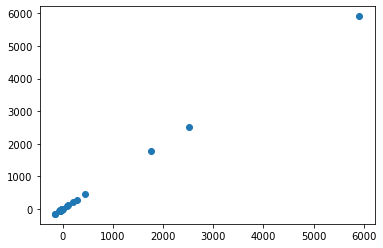

In [46]:
plt.scatter(y,ypred)

In [1]:
import pandas as pd

In [2]:
pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'